# 2. Predict Brown Dwarf Parameters Using Trained ML Models


In the following steps, you will:

We will need the following modules from `TelescopeML`:

- **DataMaster**: to prepare the synthetic brown dwarf dataset, load the trained machine learning (ML) models.
- **Predictor**: to prepare the observational brown dwarf dataset and deploy the trained ML models.
- **StatVisAnalyzer**: provide statistical test and plotting functions.
- **IO_utils**: provide functions to load the trained ML models.


In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.Predictor import *
from TelescopeML.StatVisAnalyzer import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
np.random.seed(seed=100)

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

## 2.1 Load the Brown Dwarf spectra and Trained CNNs models


### 2.1.1 Load the Synthetic spectra - training dataset 

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 wavelengths (i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 output atmospheric parameters:
- gravity ( log$g$ ) 
- temperature ( $T_{\rm eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
import os 

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__ 


# Note: insert the directory of the reference_data if you get an error reading the reference data!!!
# __reference_data_path__ = 'INSERT_DIRECTORY_OF_reference_data'


'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
train_BD

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,5.00,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,5.00,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,5.00,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,5.00,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,5.00,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30883,3.25,1000,2.50,0.7,1.533414e-08,1.244438e-08,7.703017e-09,5.262130e-09,4.671165e-09,3.026652e-09,...,2.064408e-08,1.919290e-08,1.685050e-08,1.772466e-08,1.726968e-08,1.341722e-08,1.365819e-08,8.811601e-09,4.752807e-09,2.206752e-09
30884,3.25,1000,2.50,1.0,6.942763e-09,5.536744e-09,3.501408e-09,2.445445e-09,2.168689e-09,1.477159e-09,...,4.353813e-09,4.401064e-09,4.029425e-09,4.482797e-09,4.647158e-09,3.722947e-09,3.825720e-09,1.921753e-09,8.112957e-10,3.211086e-10
30885,3.25,1000,2.50,1.3,3.758895e-09,2.988295e-09,1.968653e-09,1.417744e-09,1.260679e-09,9.059680e-10,...,1.546743e-09,1.698977e-09,1.577032e-09,1.813035e-09,1.915084e-09,1.497190e-09,1.512469e-09,5.734859e-10,1.823897e-10,6.218672e-11
30886,3.25,1000,2.50,1.7,3.150169e-09,2.503614e-09,1.672564e-09,1.218379e-09,1.085002e-09,7.942492e-10,...,1.332727e-09,1.481450e-09,1.346700e-09,1.538485e-09,1.608156e-09,1.223594e-09,1.254078e-09,4.561500e-10,1.370389e-10,4.616465e-11


### 2.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [4]:
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[output_names].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
wavelength_names = [item for item in train_BD.columns.to_list() if item not in output_names]
wavelength_names[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
wavelength_values = [float(item) for item in wavelength_names]
wavelength_values[:10]

[2.512, 2.487, 2.462, 2.438, 2.413, 2.389, 2.366, 2.342, 2.319, 2.296]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic

,wl
0,2.511960
1,2.486966
2,2.462220
3,2.437720
4,2.413464
...,...
99,0.933378
100,0.924091
101,0.914896
102,0.905792


### 2.1.3 Load the trained CNN model

- Load the trained CNN model, which includes:
    - The model parameters to apply it to a given datasets 
    - The training history to check the performance 

In [8]:
trained_CNN_model, trained_CNN_history = load_or_dump_trained_model_CNN(
                                                      output_indicator='tuned_bohb_batch32_v3_1000epoch_out10',
                                                      load_or_dump = 'load')

In [9]:
trained_CNN_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 104, 1)]             0         []                            
                                                                                                  
 Conv__B1_L1 (Conv1D)        (None, 104, 32)              160       ['input_3[0][0]']             
                                                                                                  
 Conv__B1_L2 (Conv1D)        (None, 104, 128)             16512     ['Conv__B1_L1[0][0]']         
                                                                                                  
 Conv__B1_L3 (Conv1D)        (None, 104, 288)             147744    ['Conv__B1_L2[0][0]']         
                                                                                            

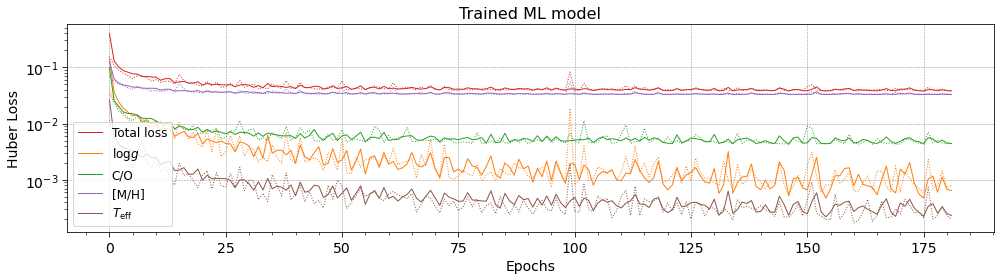

In [10]:
# train_cnn_model.trained_model_history
plot_ML_model_loss_plt(trained_ML_model_history = trained_CNN_history,
                    title = 'Trained ML model',
                    __reference_data__=__reference_data_path__,
                    __save_plots__=True,)

### 2.1.4 Load the trained data prosessing Scalers

- Load the trained StandardScalers which were trained and utilized to train the CNNs models:
    - trained_StandardScaler_X_ColWise_MinMax 
    - trained_StandardScaler_y_ColWise 

In [11]:
Load_Save = LoadSave(trained_ML_model_name = 'CNN', ml_method = 'regression')

trained_StandardScaler_X_ColWise_MinMax = Load_Save.load_or_dump_trained_object(
                                                             trained_object = None,
                                                             output_indicator = 'Trained_StandardScaler_X_ColWise_MinMax',
                                                             load_or_dump='load'
                                                                            )

trained_StandardScaler_y_ColWise = Load_Save.load_or_dump_trained_object(
                                                             trained_object = None,
                                                             output_indicator = 'Trained_StandardScaler_y_ColWise',
                                                             load_or_dump='load'
                                                                            )

---

## 2.2 Predict Brown Dwarf Atmosphric Parameters of HD 3651 B Using the Tuned Radius

In the following, we will deploy the trained CNN models to predict atmospheric parameters. Major steps are:

1. Define the literature-reported data for the object.

2. Instantiate the *ObsParameterPredictor* class from the *Predictor* module.

3. Load the observational Telescope data:
    - Replace negative Flam values with zero.
    - Take the average of neighbors for Flam_error <= 0.
    - Plot the observational spectra with error bars.

4. Process the observational Telescope data:
    - Instantiate the *ProcessObservationalDataset* class.
    - Define `feature_names_synthetic` and `feature_names_obs`.


<img src="../figures/ML_pipeline_flowchart_v2.jpg"
     alt="ML pipline"
     style="float: left; margin-right: 10px; width: 90%;" />

### 2.2.1 Tune the Radius Starting from the Literature Radius

These literature data were taken from Zhang et al. (2021) "Uniform Forward-modeling Analysis of Ultracool Dwarfs. I. Methodology and Benchmarking"  [link](https://arxiv.org/abs/2011.12294)

In [12]:
HD3651B_BD_literature_info = {
          'bd_name':'HD3651B',
          'bd_Teff':818,
          'bd_logg':3.94,
          'bd_met': -0.22, 
          'bd_distance_pc' : 11.134, 
          'bd_radius_Rjup' : .81,
          'bd_radius_Rjup_tuned': .81} #0.81



 What is the 𝛘2 value (and p-value) for a range of $R_{Jup}$ radius? 

In [13]:

def tune_radius(Rmin = HD3651B_BD_literature_info['bd_radius_Rjup']-0.2, 
                Rmax = HD3651B_BD_literature_info['bd_radius_Rjup']+0.2, 
                dR=0.05,
                Radius_list = None,
                brown_dwarf_literature_info = None,
                __plot_results__ = False,
               __print_results__ = False,
               __plot_stat_results__ = False):
    
    R_list = []
    chi_square_list = []
    p_value_list = []
    random_pred_mean_list = []
 

    for radius in Radius_list if Radius_list else list( np.linspace(Rmin, Rmax, num=int((Rmax-Rmin)/dR)+1 )):
        print(round(radius,2))
        HD3651B_BD_literature_info['bd_radius_Rjup'] = radius
        
        # brown_dwarf_literature_info = Ross458C_BD_literature_info
        predict = ObserveParameterPredictor(object_name = HD3651B_BD_literature_info['bd_name'], 
                                        training_dataset_df = train_BD,
                                        wl_synthetic = wl_synthetic,# wl_synthetic, 
                                        bd_literature_dic = HD3651B_BD_literature_info,
                                        trained_ML_model=trained_CNN_model,
                                        trained_X_ColWise_MinMax=trained_StandardScaler_X_ColWise_MinMax,
                                        trained_y_ColWise=trained_StandardScaler_y_ColWise,
                                        trained_X_RowWise=None,
                                           )

        predict.load_observational_spectra(
            __plot_observational_spectra_errorbar__=False,
            __replace_zeros_negatives_with_mean__=True,
            __print_results__=False,
            )
        
        predict.Process_Observational_Dataset(
            __print_results__=False,
            F_lambda_obs=None,
            F_lambda_obs_err=None    
                )

        predict.predict_from_random_spectra(random_spectra_num= 3,
                                             __print_results__= False,
                                             __plot_randomly_generated_spectra__= False,
                                             __plot_histogram__= False,
                                             __plot_boxplot_hist__= False,
                                             __plot_pred_vs_obs_errorbar__= False,
                                             __plot_pred_vs_obs_errorbar_stat_bokeh__ = False,
                                             __calculate_confidence_intervals_std_df__ = True,
                                            )


        chi_square, p_value =  chi_square_test(x_obs = predict.obs_data_df['wl'], 
                                y_obs = predict.obs_data_df['Fnu_obs_TOA'], 
                                yerr_obs = predict.obs_data_df['Fnu_obs_TOA_err'],

                                x_pre = predict.confidence_intervals_std_df['wl'].values[::-1], 
                                y_pre = predict.confidence_intervals_std_df['mean'], 
                                yerr_pre = predict.confidence_intervals_std_df['std_values'],
                                radius = HD3651B_BD_literature_info['bd_radius_Rjup'],
                                __plot_results__ = False,
                                __print_results__ = False)
        
        
        if chi_square:

            R_list.append(radius)
            chi_square_list.append(chi_square)
            p_value_list.append(np.float64(p_value))
            random_pred_mean_list.append(list( predict.dic_random_pred_mean.values() ))
        else:
            pass

        if __print_results__:
            print( f"Radius = {'{:.2f}'.format(radius)} R_Jup:  𝛘2 = {chi_square}, p-value = {p_value}")
            

    tuned_ML_R_param_df = pd.DataFrame(columns=['radius','chi_square','p_value','gravity','temperature','c_o_ratio','metallicity'])
    tuned_ML_R_param_df['radius'] = R_list
    tuned_ML_R_param_df['chi_square'] = chi_square_list
    tuned_ML_R_param_df['p_value'] = p_value_list
    tuned_ML_R_param_df['gravity'] = np.array(random_pred_mean_list).T[0]
    tuned_ML_R_param_df['c_o_ratio'] = np.array(random_pred_mean_list).T[1]
    tuned_ML_R_param_df['metallicity'] = np.array(random_pred_mean_list).T[2]
    tuned_ML_R_param_df['temperature'] = np.array(random_pred_mean_list).T[3]
    
    tuned_ML_R_param_df.to_csv(os.path.join(__reference_data_path__+'figures',
                                                     brown_dwarf_literature_info['bd_name']+
                                                     'tuned_ML_R_param_df.csv'),
                                                      index = False,
                                                      columns=list(tuned_ML_R_param_df.columns))
    return tuned_ML_R_param_df

In [14]:
Rmin = np.round(HD3651B_BD_literature_info['bd_radius_Rjup'],1)- 0.4
Rmax = np.round(HD3651B_BD_literature_info['bd_radius_Rjup'],1)+ 0.4
Radius_list = list( np.linspace(Rmin, Rmax, num=int((Rmax - Rmin) / 0.1) + 1).round(2) )

HD3651B_tuned_ML_R_param_df = tune_radius(
                        Rmin = Rmin, 
                        Rmax = Rmax, 
                        dR = 0.1,
                        Radius_list = Radius_list, #list(np.linspace(.6,1.1,num=51)),
                        brown_dwarf_literature_info = HD3651B_BD_literature_info,
                        __plot_results__=True,
                        __print_results__=True,
                        __plot_stat_results__=True,)

0.4
Radius = 0.40 R_Jup:  𝛘2 = 233.95, p-value = 3.48e-12
0.5
Radius = 0.50 R_Jup:  𝛘2 = 410.57, p-value = 0.00e+00
0.6
Radius = 0.60 R_Jup:  𝛘2 = 110.33, p-value = 2.93e-01
0.7
Radius = 0.70 R_Jup:  𝛘2 = 91.85, p-value = 7.76e-01
0.8
Radius = 0.80 R_Jup:  𝛘2 = 120.13, p-value = 1.19e-01
0.9
Radius = 0.90 R_Jup:  𝛘2 = 281.54, p-value = 0.00e+00
1.0
Radius = 1.00 R_Jup:  𝛘2 = 109.25, p-value = 3.18e-01
1.1
Radius = 1.10 R_Jup:  𝛘2 = 29.78, p-value = 1.00e+00
1.2
Radius = 1.20 R_Jup:  𝛘2 = 118.38, p-value = 1.43e-01


In [15]:
HD3651B_tuned_ML_R_param_df

,radius,chi_square,p_value,gravity,temperature,c_o_ratio,metallicity
0,0.4,233.95,3.480000e-12,4.832331,939.179952,1.844077,-0.496821
1,0.5,410.57,0.000000e+00,4.814885,892.189718,1.847839,-0.499227
2,0.6,110.33,2.930000e-01,4.883448,779.078389,1.667856,-0.506795
3,0.7,91.85,7.760000e-01,4.851073,806.518250,1.968732,-0.491895
4,0.8,120.13,1.190000e-01,4.806926,771.341044,1.652553,-0.507912
5,0.9,281.54,0.000000e+00,4.835071,799.344014,1.504192,-0.518659
6,1.0,109.25,3.180000e-01,5.061557,793.043722,1.996132,-0.500215
7,1.1,29.78,1.000000e+00,4.899004,797.665568,1.829147,-0.502211
8,1.2,118.38,1.430000e-01,4.920628,758.933187,1.676004,-0.507382


### Summary of Key Statistics Provided by `.describe()`

- **Count**: The number of non-null entries.
- **Mean**: The average of the data.
- **Standard Deviation (std)**: Measures the dispersion of the data from the mean.
- **Minimum (min)**: The smallest value in the dataset.
- **25% (First Quartile)**: The median of the lower half of the dataset (25th percentile).
- **50% (Median)**: The middle value of the dataset (50th percentile).
- **75% (Third Quartile)**: The median of the upper half of the dataset (75th percentile).
- **Maximum (max)**: The largest value in the dataset.


In [16]:
HD3651B_tuned_ML_R_param_df.describe()

,radius,chi_square,p_value,gravity,temperature,c_o_ratio,metallicity
count,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,0.800000,167.308889,2.943333e-01,4.878325,815.254872,1.776281,-0.503457
std,0.273861,118.591370,3.612599e-01,0.078795,60.018636,0.161646,0.007788
min,0.400000,29.780000,0.000000e+00,4.806926,758.933187,1.504192,-0.518659
25%,0.600000,109.250000,3.480000e-12,4.832331,779.078389,1.667856,-0.507382
50%,0.800000,118.380000,1.430000e-01,4.851073,797.665568,1.829147,-0.502211
75%,1.000000,233.950000,3.180000e-01,4.899004,806.518250,1.847839,-0.499227
max,1.200000,410.570000,1.000000e+00,5.061557,939.179952,1.996132,-0.491895


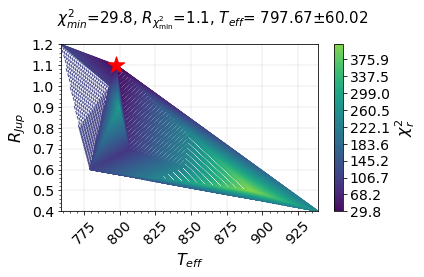

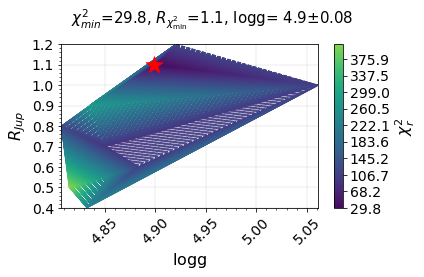

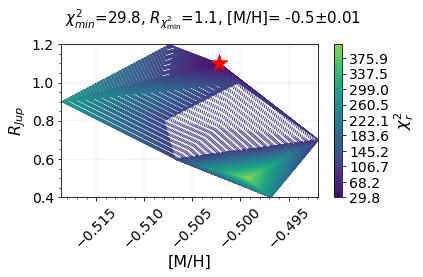

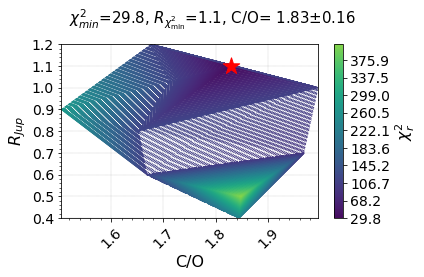

In [17]:
plot_tricontour_chi2_radius(tuned_ML_R_param_df = HD3651B_tuned_ML_R_param_df,
                            literature_info = HD3651B_BD_literature_info,
                                list_=['temperature', 'gravity', 'metallicity', 'c_o_ratio'],
                                __reference_data__ = __reference_data_path__,
                                __save_plot__=True)

---


### 2.2.1 Load the data and process

Define the literature data reported for this object

This data will be used later to: 
- Compare the Literature vs ML predicted results
- Convert the unit of the real observational dataset or fluxes from $F_\lambda$ to $F_\nu$ and $F_\nu^{TOA}$
- Revised the object radius

Note: These literature data were taken from Zhang et al. (2021) "Uniform Forward-modeling Analysis of Ultracool Dwarfs. I. Methodology and Benchmarking"  [link](https://arxiv.org/abs/2011.12294)

In [18]:
HD3651B_BD_literature_info = {
          'bd_name':'HD3651B',
          'bd_Teff':818,
          'bd_logg':3.94,
          'bd_met': -0.22, 
          'bd_distance_pc' : 11.134, 
          'bd_radius_Rjup' : 1.19,
          'bd_radius_Rjup_tuned': .81} #0.81

brown_dwarf_literature_info = HD3651B_BD_literature_info



<font size="4"> Instintiate the *ObserveParameterPredictor* class from *Predictor* module </font>

*ObserveParameterPredictor* class performs the following tasks:
- Load the observational datasets
- Process the data including converting their units
- Visualize the data

In [19]:
# brown_dwarf_literature_info 
predict = ObserveParameterPredictor(
                                object_name = HD3651B_BD_literature_info['bd_name'], #e.g., HD3651B
                                training_dataset_df = train_BD,
                                wl_synthetic = wl_synthetic, 
                                bd_literature_dic = HD3651B_BD_literature_info,
                                trained_ML_model = trained_CNN_model,
                                trained_X_ColWise_MinMax=trained_StandardScaler_X_ColWise_MinMax,
                                trained_y_ColWise=trained_StandardScaler_y_ColWise,
                                trained_X_RowWise=None,
                                )

<font size="4">  Load the observational Telescope data </font>


In [20]:
predict.load_observational_spectra(
    __plot_observational_spectra_errorbar__=True,
    __replace_zeros_negatives_with_mean__=True,
    __print_results__=True,
    )

------- Observational DataFrame Example ---------
         wl      F_lambda  F_lambda_error  F_lambda_obs  F_lambda_obs_err
0  0.650857  8.606238e-17    4.358173e-17  8.606238e-17      4.358173e-17
1  0.653073  1.771977e-17    3.360256e-17  1.771977e-17      3.360256e-17
2  0.655278  7.300979e-17    3.132892e-17  7.300979e-17      3.132892e-17
3  0.657472  2.569511e-17    2.837585e-17  2.569511e-17      2.837585e-17
4  0.659659  3.786160e-18    2.497690e-17  3.786160e-18      2.497690e-17


Loading BokehJS ...

### 2.2.2 Process the observational Telescope data

In [21]:
predict.Process_Observational_Dataset(
    __print_results__=False,
    F_lambda_obs=None,
    F_lambda_obs_err=None    )

In [22]:
predict.obs_data_df.columns

Index(['wl', 'F_lambda', 'F_lambda_error', 'F_lambda_obs', 'F_lambda_obs_err',
       'Fnu_obs', 'Fnu_obs_err', 'Fnu_obs_TOA', 'Fnu_obs_TOA_err'],
      dtype='object')

<font size="4">  Check the processed Telescope dataset </font>

This dataframe includes the following columns:

- **wl (wavelengths in $\mu m$)**: Wavelengths from the observational dataset.

- **F_lambda ($F_\lambda$)**: Original observational spectral density flux along the wavelength axis.
- **F_lambda_error ($F_\lambda^{error}$)**: Original observational spectral density flux uncertainty along the wavelength axis.
- **F_lambda_obs ($F_\lambda^{obs}$)**: Same as the original F_lambda but with a more descriptive label.
- **F_lambda_obs_err ($F_\lambda^{error, obs}$)**: Same as the original F_lambda_error but with a more descriptive label.
- **Fnu_obs ($F_\nu^{obs}$)**: Observational spectral density flux along the frequency axis (converted from the F_lambda column).
- **Fnu_obs_err ($F_\nu^{error}$)**: Observational spectral density flux uncertainty along the frequency axis (converted from the  F_lambda column).
- **Fnu_obs_TOA ($F_\nu^{obs, abs}$)**: Observational TOA spectral density flux along the frequency axis (converted from the F_lambda column).
- **Fnu_obs_TOA_err ($F_\nu^{obs, abs, error}$)**: Observational TOA spectral density flux uncertainty along the frequency axis (converted from the F_lambda column).



In [23]:
predict.obs_data_df.head(6)

,wl,F_lambda,F_lambda_error,F_lambda_obs,F_lambda_obs_err,Fnu_obs,Fnu_obs_err,Fnu_obs_TOA,Fnu_obs_TOA_err
0,0.650857,8.606238e-17,4.358173e-17,8.606238e-17,4.358173e-17,1.216085e-27,6.158216e-28,1.983163e-08,1.004268e-08
1,0.653073,1.771977e-17,3.360256e-17,1.771977e-17,3.360256e-17,2.520930e-28,4.780520e-28,4.111076e-09,7.795964e-09
2,0.655278,7.300979e-17,3.132892e-17,7.300979e-17,3.132892e-17,1.045711e-27,4.487205e-28,1.705321e-08,7.317633e-09
3,0.657472,2.569511e-17,2.837585e-17,2.569511e-17,2.837585e-17,3.704967e-28,4.091501e-28,6.041977e-09,6.672328e-09
4,0.659659,3.786160e-18,2.497690e-17,3.786160e-18,2.497690e-17,5.495628e-29,3.625408e-28,8.962146e-10,5.912234e-09
5,0.661837,1.798661e-17,2.475434e-17,1.798661e-17,2.475434e-17,2.628032e-28,3.616868e-28,4.285736e-09,5.898308e-09


### 2.2.3 Deploy the Trained ML Models for Prediction: 

<font size="4"> *predict_from_random_spectra* function from *Predictor* class to perform the following tasks: </font>
    
- Generate random spectra based on the observational data

- Deploy the trained ML models to predict the target outputs: 
    - gravity ( log$g$ )
    - temperature ( T$_{eff}$ )
    - carbon-to-oxygen ratio ( C/O )
    - metallicity ( [M/H] )

- Print the results, including:
    - Predicted Targets from Randomly Generated Spectra.
    - Print a summary of descriptive statistics, including the mean, standard deviation, and the shape of a dataset's distribution (percentiles).

- Visualize the results to gain insights about:
    - *Histograms* representing the distribution of the predicted target outputs by the trained ML models.
    - *Boxplots* displaying the first quartile, median, third quartile, and maximum. In a box plot, the box is drawn from the first quartile to the third quartile. A vertical black line goes through the box at the median, and a vertical white line goes through the box to indicate the mean.


******************************

Predicted Targets from Randomly Generated Spectra:

{   'c_o_ratio': 1.7922842025756835,
    'gravity': 4.857903385162354,
    'metallicity': -0.505011385679245,
    'temperature': 742.0279724121094}
******************************

            logg        c_o        met           T
count  10.000000  10.000000  10.000000   10.000000
mean    4.857903   1.792284  -0.505011  742.027972
std     0.172011   0.245937   0.012871   42.790039
min     4.544462   1.500159  -0.520769  694.708496
25%     4.735796   1.510639  -0.518816  703.486450
50%     4.878034   1.964647  -0.499246  732.769257
75%     4.982469   1.988562  -0.495063  773.159149
max     5.111677   1.999956  -0.488801  814.944519


<Figure size 432x288 with 0 Axes>

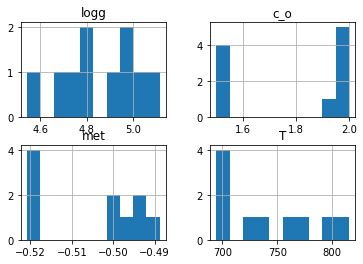

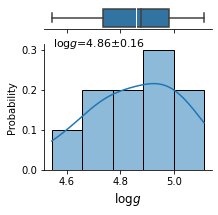

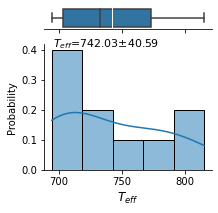

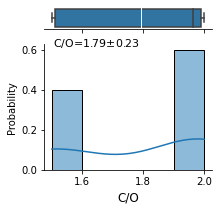

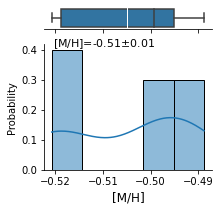

Radius = 1.19 R_Jup:  𝛘2 = 162.69, p-value = 1.62e-04


In [24]:
predict.predict_from_random_spectra(random_spectra_num= 10,
                                     __print_results__= True,
                                     __plot_randomly_generated_spectra__= True,
                                     __plot_histogram__= True,
                                     __plot_boxplot_hist__= True,
                                     __plot_pred_vs_obs_errorbar__= False,
                                     __plot_pred_vs_obs_errorbar_stat_bokeh__ = True,
                                     __plot_pred_vs_obs_errorbar_stat_matplotlib__ = False,
                                     __calculate_confidence_intervals_std_df__ = True,
                                    __reference_data__ = __reference_data_path__,
                                     __save_plots__=True,
                                    )

---